Step 1/2:

Loads Libraries and Dataset

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns
scaler = StandardScaler()
enc = LabelEncoder()
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True,axis=0)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Step 3/4:

Since Region and Channel would classify more as y values I omit them and proceed to Preprocess the data by scaling it

In [6]:
df1 = df.copy()
df1= df1.drop(['Channel','Region'], axis=1)
df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
scal_feat = df1.copy()
col_names = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
feat = scal_feat[col_names]
feat = scaler.fit_transform(feat.values)
scal_feat[col_names] = feat
X = scal_feat
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [18]:
X.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Step 5:

I use an elbow Graph to find the best K value and determine that at 5 we probably have enough and work off of that

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'SSE')

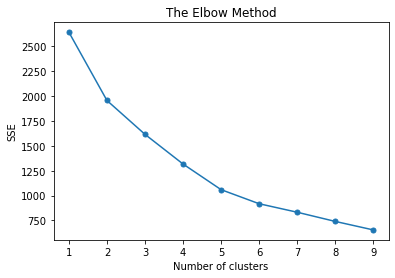

In [20]:
scores = []
for i in range(1, 10):
    kmodel = KMeans(n_clusters=i, random_state=0)
    kmodel.fit(X)
    scores.append(kmodel.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 10), scores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [22]:
kmeans = KMeans(n_clusters=5, tol = 0.01,random_state = 0)
kmeans.fit(X)
Ky = kmeans.predict(X)

In [28]:
kmeans.inertia_

1059.58575247567

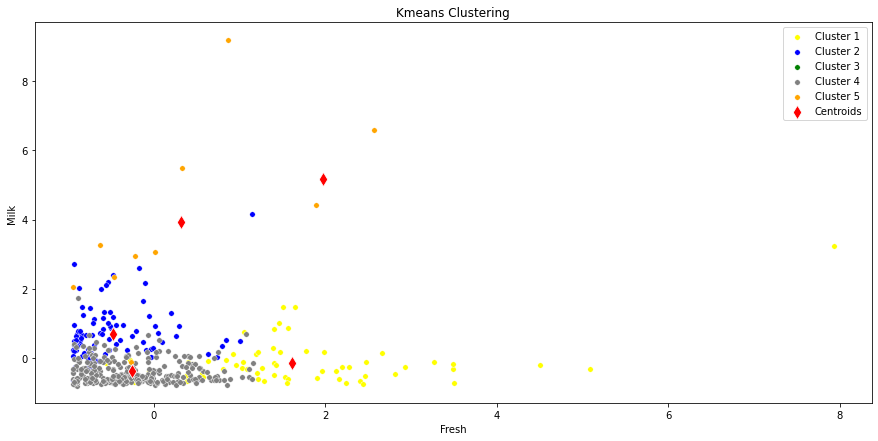

In [41]:
def KClus():
    import seaborn as sns
    plt.figure(figsize=(15,7))
    sns.scatterplot(X.iloc[Ky == 0, 0], X.iloc[Ky == 0, 1], color = 'yellow', label = 'Cluster 1',s=30)
    sns.scatterplot(X.iloc[Ky == 1, 0], X.iloc[Ky == 1, 1], color = 'blue', label = 'Cluster 2',s=30)
    sns.scatterplot(X.iloc[Ky == 2, 0], X.iloc[Ky == 2, 1], color = 'green', label = 'Cluster 3',s=30)
    sns.scatterplot(X.iloc[Ky == 3, 0], X.iloc[Ky == 3, 1], color = 'grey', label = 'Cluster 4',s=30)
    sns.scatterplot(X.iloc[Ky == 4, 0], X.iloc[Ky == 4, 1], color = 'orange', label = 'Cluster 5',s=30)
    sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                    label = 'Centroids',s=100,marker='d')
    plt.grid(False)
    plt.title('Kmeans Clustering')
    plt.legend()
    plt.show()
    return
KClus()

Step 6 Optional:

I use a Dendrogram to find the ideal amount of clusters which i decide are 5. I wish there was a way to merge orange and green but I suppose thats not possible

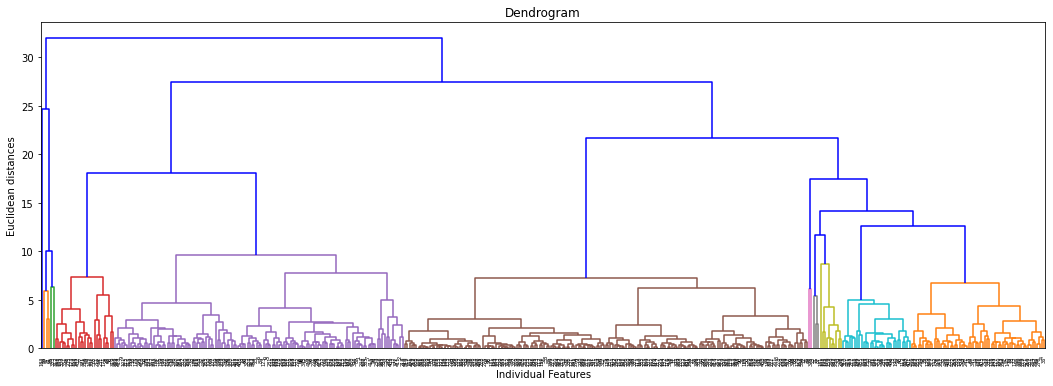

In [30]:
plt.figure(figsize=(18,6))
plt.title('Dendrogram')
plt.xlabel('Individual Features')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method ='ward'),
                            color_threshold=10, 
                            above_threshold_color='blue')

In [37]:
Agg = AgglomerativeClustering(n_clusters=5, linkage='average')
Agg.fit(X)
Ay = kmeans.fit_predict(X)

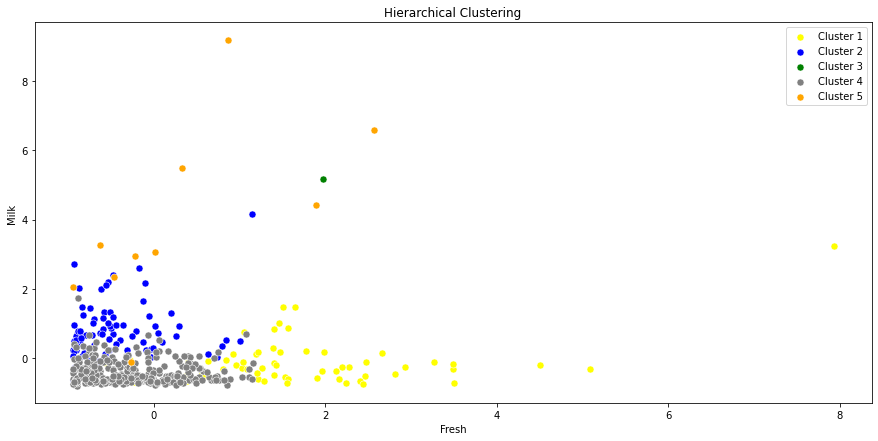

In [39]:
def HClus():
    import seaborn as sns
    plt.figure(figsize=(15,7))
    sns.scatterplot(X.iloc[Ay == 0, 0], X.iloc[Ay == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
    sns.scatterplot(X.iloc[Ay == 1, 0], X.iloc[Ay == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
    sns.scatterplot(X.iloc[Ay == 2, 0], X.iloc[Ay == 2, 1], color = 'green', label = 'Cluster 3',s=50)
    sns.scatterplot(X.iloc[Ay == 3, 0], X.iloc[Ay == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
    sns.scatterplot(X.iloc[Ay == 4, 0], X.iloc[Ay == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
    plt.grid(False)
    plt.title('Hierarchical Clustering')
    plt.legend()
    plt.show()
    return
HClus()